##### Import libraries

In [107]:
import pandas as pd
import numpy as np
import json
import requests
import os
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


## Data Gathering

There are three different sources the data needs to be gathered from. Then it needs to be loaded into a dataframe to work with it

##### Import prediction file from the web

In [108]:
# Download the tweet image prediction tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

filename = url.split('/')[-1]
with open(filename, mode='wb') as file :
      file.write(response.content)

# Load data from downloaded file
df_predictions = pd.read_csv(filename, sep='\t')


In [109]:
# test
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Load twitter archive csv

In [110]:
# load twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [111]:
# test
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


##### Import tweets list via twitter API

In [112]:
# the tweets data is saved in a txt file before so the code here is just for showing purpose

# getting the tweets list from the API
# Set  twitter credentials
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

# Authenticate with tweepy
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = df_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#   for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#           pass
#end = timer()
#print(end - start)
#print(fails_dict) 

In [113]:
#converting relevant json data into dataframe from the tweet lists
tweets_list = []

with open('tweet-json.txt') as json_file:
    for line in json_file:
        tweets_dict = {}
        tweets_json = json.loads(line)
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'
        
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        tweets_list.append(tweets_dict)

In [114]:
df_tweets = pd.DataFrame(tweets_list)

In [115]:
# test
df_tweets.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420639486877696
1,33819,6514,892177413194625024
2,25461,4328,891815175371796480
3,42908,8964,891689552724799489
4,41048,9774,891327551943041024


## Assesing the Data

Detect 8 quality issues and 2 tidiness issues

In [116]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Comment: There is dirty data in some columns as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, doggo, floofer, pupper, puppo

In [117]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are false datatypes in timestamp and only a few non null values in n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
There are no duplicated values

In [118]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Even for p1_conf there are some quite low values of confidence in predicting the breed of the dog

In [119]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [120]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There is no missing data and correct data types

In [121]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


There is a wrong data type in the tweet_id column

In [122]:
df_tweets.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


##### Quality:
- Only original tweets are allowed --> delete all rows which have values in: 
    in_reply_to_status_id, 
    in_reply_to_user_id, 
    retweeted_status_id,
    retweeted_status_user_id
- Missing values in expanded url
- Find and update incorrect ratings
- tweet_id in df_tweets are some na values --> delete data with na values
- tweet_id in df_tweets is type object --> change tweet_id in df_tweets in type int
- timestap in df_archive is type object --> change type into date format
- rename column names in df_archive as some names are not intuitive
    timestamp into tweet_timestamp
    text into tweet_text
- delete not useful columns for this project:
    source, expanded_urls
- rating information cannot be used like this --> calculate rating (nominator/denominator) and insert new column to have information that can be analysed



##### Tidiness:
- four columns for each dog stage (one variable in four columns) --> make one column with the stage of the dog and then delete the other four
- bring dog type predicition into a table with dog other dog information with the breed of p1
- merge the data into one big dataframe as it provides all information about one observation

## Data Cleaning

##### Quality issues

In [123]:
# copy original data
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean = df_tweets.copy()

##### Define: 
Delete all rows with data from not original tweets

##### Code

In [124]:
# Only original tweets are allowed --> delete all rows which have values in: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id

df_archive_clean.drop(df_archive_clean[df_archive_clean.in_reply_to_status_id.notnull()].index, inplace=True)
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index, inplace=True)

In [125]:
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean.drop(drop_columns, inplace = True, axis = 1)

##### Test

In [126]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


##### Define
Change the datatype of timestamp in the archive

##### Code

In [127]:
# timestap in df_archive is type object --> change type into date format
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

##### Test

In [128]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


##### Define
Rename columns in the archive data for more intuitiv names

##### Code

In [129]:
# rename column names in df_archive as some names are not intuitive
df_archive_clean = df_archive_clean.rename(columns={
    'timestamp': 'tweet_timestamp',
    'text': 'tweet_text'
})

##### Test

In [130]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
tweet_timestamp       2097 non-null datetime64[ns]
source                2097 non-null object
tweet_text            2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


###### Define
Delete not useful columns for the purpose of this analysis

##### Code

In [131]:
# delete not useful columns for this project: source, expanded_urls
drop_columns = ['source', 'expanded_urls']
df_archive_clean.drop(drop_columns, inplace = True, axis = 1)


##### Test

In [132]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
tweet_timestamp       2097 non-null datetime64[ns]
tweet_text            2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


##### Define
Find and update incorecct ratings

##### Code

In [133]:
df_archive_clean[df_archive_clean.rating_denominator!=10]

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,None,None,None,None,None


In [134]:
ttext = df_archive_clean[df_archive_clean.rating_denominator!=10].tweet_text

In [135]:
pd.set_option('display.max_colwidth', -1)
ttext

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

In [136]:
df_archive_clean.at[516, 'rating_numerator']=0
df_archive_clean.at[516, 'rating_denominator']=0
df_archive_clean.at[2335, 'rating_numerator']=9
df_archive_clean.at[2335, 'rating_denominator']=10
df_archive_clean.at[1068, 'rating_numerator']=14
df_archive_clean.at[1068, 'rating_denominator']=10
df_archive_clean.at[1165, 'rating_numerator']=13
df_archive_clean.at[1165, 'rating_denominator']=10
df_archive_clean.at[1120, 'rating_numerator']=11
df_archive_clean.at[1120, 'rating_denominator']=10
df_archive_clean.at[1662, 'rating_numerator']=10
df_archive_clean.at[1662, 'rating_denominator']=10

##### Test

In [137]:
df_archive_clean[df_archive_clean.rating_denominator!=10]

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,0,0,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,None,None,None,None,None


##### Define
insert new column with a generel rating information

Code

In [138]:
# rating information cannot be used like this --> calculate rating (nominator/denominator) and insert new column to have information that can be analysed

df_archive_clean['ratings'] = df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator']

##### Test

In [139]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
tweet_timestamp       2097 non-null datetime64[ns]
tweet_text            2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
ratings               2096 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 276.6+ KB


##### Define
delete wrong tweet_id columns in the tweet list and change datatype into int

##### Code

In [140]:
## tweet_id in df_tweets is type object --> change tweet_id in df_tweets in type int
df_tweets_clean = df_tweets_clean[df_tweets_clean.tweet_id!='na']

In [141]:
# tweet_id in df_tweets is type object --> change tweet_id in df_tweets in type int

df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(int)

##### Test

In [142]:
# test
df_tweets_clean.head(30)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420639486877696
1,33819,6514,892177413194625024
2,25461,4328,891815175371796480
3,42908,8964,891689552724799489
4,41048,9774,891327551943041024
5,20562,3261,891087942176911360
6,12041,2158,890971906207338496
7,56848,16716,890729118844600320
8,28226,4429,890609177319665665
9,32467,7711,890240245463175168


In [143]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
tweet_id          2073 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


##### Tidiness Issues

##### Define
Merge dog stage into one column

##### Code

In [144]:
#df_test = df_archive_clean.copy()
df_archive_clean['dog_stage'] = np.where(df_archive_clean['doggo'] == 'doggo', df_archive_clean['doggo'],
                              np.where(df_archive_clean['puppo'] == 'puppo', df_archive_clean['puppo'],
                              np.where(df_archive_clean['pupper'] == 'pupper', df_archive_clean['pupper'],
                              'None'
                              )))
df_archive_clean['dog_stage'].value_counts()

None      1770
pupper    221 
doggo     83  
puppo     23  
Name: dog_stage, dtype: int64

In [145]:
# Create dog stage field
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['puppo'] + df_archive_clean['pupper']

# Replace 'None' with empty string
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace('None', '')

# Prettify value for tweets with both doggo and pupper
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace('doggopupper', 'doggo and pupper')

##### Test

In [146]:
df_archive_clean.head(5)

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,1.3,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,1.3,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,1.2,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,1.3,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,1.2,


In [147]:
df_archive_clean['dog_stage'].value_counts()

                    1770
pupper              221 
doggo               73  
puppo               23  
doggo and pupper    9   
doggopuppo          1   
Name: dog_stage, dtype: int64

In [148]:
# drop unneeded columns
drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean.drop(drop_columns, inplace = True, axis = 1)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
tweet_timestamp       2097 non-null datetime64[ns]
tweet_text            2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
ratings               2096 non-null float64
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 227.4+ KB


##### Create new main dataframe

In [149]:
# create new dataframe as main dataframe
df = df_archive_clean.copy()

In [150]:
df.head()

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,ratings,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,1.3,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,1.3,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,1.2,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,1.3,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,1.2,


##### Define
Merge the archive with the prediction dataframe

##### Code

In [151]:
#bring dog type predicition into a table with dog other dog information with the breed of p1
df = df.merge(df_predictions_clean, on='tweet_id')

##### Test

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 19 columns):
tweet_id              1971 non-null int64
tweet_timestamp       1971 non-null datetime64[ns]
tweet_text            1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
ratings               1970 non-null float64
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(4), object(7)
memory

##### Define
Drop not needed columns in the new main dataframe

##### Code

In [153]:
#drop not needed columns and rows --> only take predicitions output serious when p1 is true
drop_columns = ['jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df.drop(drop_columns, inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
tweet_timestamp       1971 non-null datetime64[ns]
tweet_text            1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
ratings               1970 non-null float64
dog_stage             1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 186.7+ KB


##### Test

In [154]:
df.head()

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,ratings,dog_stage,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,1.3,,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,1.3,,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,1.2,,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,1.3,,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,1.2,,2,basset,0.555712,True


##### Define
Rename new columns in the main dataframe

##### Code

In [155]:
# rename column names and all values need to be lowercase 
df = df.rename(columns={'img_num':'img_numbers',
                          'p1': 'predicted_breed',
                           'p1_conf': 'predicted_likelihood',
                           'p1_dog': 'breed_state'})


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                1971 non-null int64
tweet_timestamp         1971 non-null datetime64[ns]
tweet_text              1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1971 non-null object
ratings                 1970 non-null float64
dog_stage               1971 non-null object
img_numbers             1971 non-null int64
predicted_breed         1971 non-null object
predicted_likelihood    1971 non-null float64
breed_state             1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 186.7+ KB


##### Define
lowercase all the values in predicted breed

##### Code

In [157]:
# lowercase description
df['predicted_breed'] = df['predicted_breed'].str.lower()

##### Test

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                1971 non-null int64
tweet_timestamp         1971 non-null datetime64[ns]
tweet_text              1971 non-null object
rating_numerator        1971 non-null int64
rating_denominator      1971 non-null int64
name                    1971 non-null object
ratings                 1970 non-null float64
dog_stage               1971 non-null object
img_numbers             1971 non-null int64
predicted_breed         1971 non-null object
predicted_likelihood    1971 non-null float64
breed_state             1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 186.7+ KB


##### Define
Merge the main dataframe with the tweets dataframe

##### Code & Test

In [159]:
df_tweets_clean.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420639486877696
1,33819,6514,892177413194625024
2,25461,4328,891815175371796480
3,42908,8964,891689552724799489
4,41048,9774,891327551943041024


In [160]:
# tweet_id in tweets dataframe and archive dataframe are not the same --> merging does not work
#df_tweets_clean[df_tweets_clean.tweet_id==892177421306343426]

In [161]:
df_tweets_clean = df_tweets_clean[['tweet_id', 'favorite_count','retweet_count']]

In [162]:
df.head()

,tweet_id,tweet_timestamp,tweet_text,rating_numerator,rating_denominator,name,ratings,dog_stage,img_numbers,predicted_breed,predicted_likelihood,breed_state
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,1.3,,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,1.3,,1,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,1.2,,1,chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,1.3,,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,1.2,,2,basset,0.555712,True


In [163]:
#data = pd.merge(df, df_tweets_clean, on='tweet_id')

In [164]:
df = df[['tweet_id', 'tweet_text', 'tweet_timestamp', 'rating_numerator', 'rating_denominator', 'ratings', 'name', 'dog_stage', 'predicted_breed', 'img_numbers']]

In [165]:
df.head(2)

,tweet_id,tweet_text,tweet_timestamp,rating_numerator,rating_denominator,ratings,name,dog_stage,predicted_breed,img_numbers
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-08-01 16:23:56,13,10,1.3,Phineas,,orange,1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-08-01 00:17:27,13,10,1.3,Tilly,,chihuahua,1


Merging the two dataframes together does not work with a join on tweet_id so we keep this tables apart and make seperat analysis

## Data Analysis

In [166]:
# safe in csv file
df.to_csv('twitter_archive_master.csv', index=False)

In [167]:
import matplotlib.pyplot as plt

#### Dog information

Which dog stage is most common?

In [168]:
x = df['dog_stage'].value_counts()
x

                    1675
pupper              201 
doggo               64  
puppo               22  
doggo and pupper    8   
doggopuppo          1   
Name: dog_stage, dtype: int64

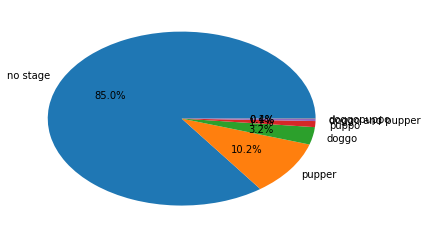

In [169]:
plt.pie(x, labels=['no stage','pupper','doggo','puppo', 'doggo and pupper', 'doggopuppo'], autopct='%1.1f%%')
plt.show()

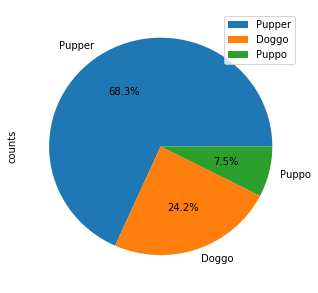

In [170]:
stage = pd.DataFrame({'counts': [209, 74, 23],},
                  index=['Pupper', 'Doggo', 'Puppo'])
plot = stage.plot.pie(y='counts', figsize=(5, 5), autopct='%1.1f%%')

Pupper dogs seem to be the most common dog stage.

Which dog breed are the most common 20 breeds?

In [171]:
df.predicted_breed.value_counts().head(20)

golden_retriever             137
labrador_retriever           94 
pembroke                     88 
chihuahua                    78 
pug                          54 
chow                         41 
samoyed                      40 
pomeranian                   38 
toy_poodle                   37 
malamute                     29 
cocker_spaniel               27 
french_bulldog               26 
chesapeake_bay_retriever     23 
miniature_pinscher           21 
seat_belt                    21 
german_shepherd              20 
siberian_husky               20 
staffordshire_bullterrier    19 
eskimo_dog                   18 
shetland_sheepdog            18 
Name: predicted_breed, dtype: int64

#### Tweet information

Text(0,0.5,'favorite count')

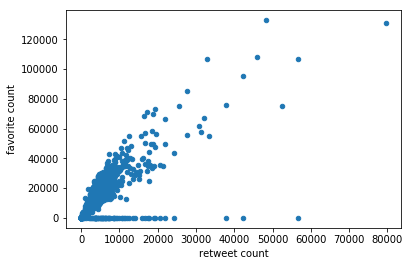

In [172]:
ax = df_tweets_clean.plot(kind='scatter', x = 'retweet_count', y = 'favorite_count')

ax.set_xlabel('retweet count')
ax.set_ylabel('favorite count')

In [173]:
correlation = df_tweets_clean.corr(method='pearson')
correlation

,tweet_id,favorite_count,retweet_count
tweet_id,1.000000,0.624716,0.382923
favorite_count,0.624716,1.000000,0.790476
retweet_count,0.382923,0.790476,1.000000


There is a high correlation between the favorite count and the retweet count

Which dog stage has the highest ratings?

In [174]:
df.groupby(['dog_stage']).ratings.mean()

dog_stage
                    1.180466
doggo               1.187500
doggo and pupper    1.100000
doggopuppo          1.300000
pupper              1.071642
puppo               1.200000
Name: ratings, dtype: float64

Which common dog breed has the highest ratings?

Text(0,0.5,'Rating')

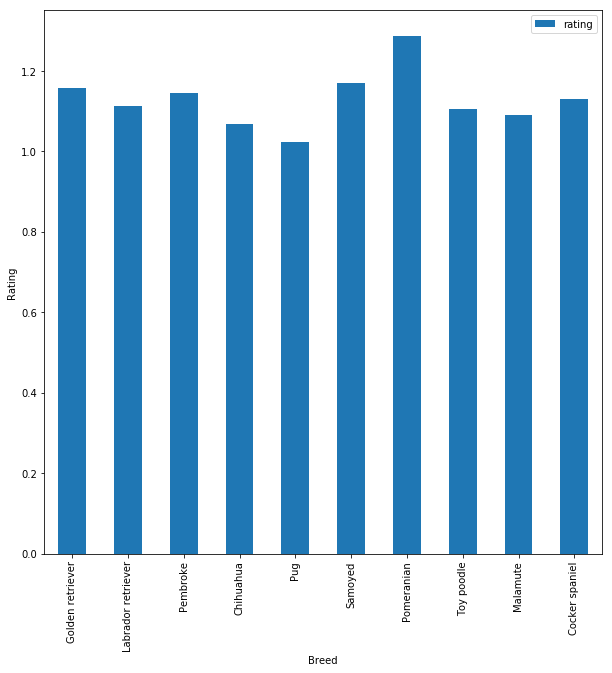

In [175]:
breed = pd.DataFrame({'rating': [df[df.predicted_breed=='golden_retriever'].ratings.mean(), df[df.predicted_breed=='labrador_retriever'].ratings.mean(), df[df.predicted_breed=='pembroke'].ratings.mean(), df[df.predicted_breed=='chihuahua'].ratings.mean(), df[df.predicted_breed=='pug'].ratings.mean(), df[df.predicted_breed=='samoyed'].ratings.mean(), df[df.predicted_breed=='pomeranian'].ratings.mean(), df[df.predicted_breed=='toy_poodle'].ratings.mean(), df[df.predicted_breed=='malamute'].ratings.mean(), df[df.predicted_breed=='cocker_spaniel'].ratings.mean()]},
                  index=['Golden retriever', 'Labrador retriever', 'Pembroke', 'Chihuahua', 'Pug', 'Samoyed', 'Pomeranian', 'Toy poodle', 'Malamute', 'Cocker spaniel'])
plot = breed.plot.bar(figsize=(10, 10))
plt.xlabel('Breed')
plt.ylabel('Rating')


There is a small difference in the mean rating based on the dog breed.
Single values:

In [176]:
df[df.predicted_breed=='golden_retriever'].ratings.mean()

1.1580882352941178

In [177]:
df[df.predicted_breed=='labrador_retriever'].ratings.mean()

1.1127659574468085

In [178]:
df[df.predicted_breed=='pembroke'].ratings.mean()

1.1443181818181818

In [179]:
df[df.predicted_breed=='chihuahua'].ratings.mean()

1.0692307692307694

In [180]:
df[df.predicted_breed=='pug'].ratings.mean()

1.0240740740740741

In [181]:
df[df.predicted_breed=='samoyed'].ratings.mean()

1.1699999999999999

In [182]:
df[df.predicted_breed=='pomeranian'].ratings.mean()

1.2868421052631582

In [183]:
df[df.predicted_breed=='toy_poodle'].ratings.mean()

1.1054054054054057

In [184]:
df[df.predicted_breed=='malamute'].ratings.mean()

1.0896551724137931

In [185]:
df[df.predicted_breed=='cocker_spaniel'].ratings.mean()

1.1296296296296295